In [2]:
# Import necessary library
import pandas as pd

# Load the updated dataset
data = pd.read_csv(r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv')

# Check the first few rows to understand the structure and types of data
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356 entries, 0 to 8355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8356 non-null   int64  
 1   Property ID         8356 non-null   int64  
 2   Locality data       8356 non-null   int64  
 3   Price               8356 non-null   int64  
 4   Property type       8356 non-null   object 
 5   Number of bedrooms  8356 non-null   float64
 6   Living area m²      8356 non-null   float64
 7   Equipped kitchen    8356 non-null   int64  
 8   Furnished           8356 non-null   int64  
 9   Open fire           8356 non-null   int64  
 10  Terrace surface m²  4087 non-null   float64
 11  Garden area m²      2388 non-null   float64
 12  Swimming pool       8356 non-null   int64  
 13  Building condition  8356 non-null   object 
 14  Price per m²        8356 non-null   float64
 15  Region              8356 non-null   object 
 16  Provin

(None,
    Unnamed: 0  Property ID  Locality data   Price Property type  \
 0        9333     20135745           8300  999999     apartment   
 1        1737     20206578           4140  999999         house   
 2        7967     20135600           8300  999999     apartment   
 3        2563     20234889           1851  999000         house   
 4        5435     20215434           1160  997000     apartment   
 
    Number of bedrooms  Living area m²  Equipped kitchen  Furnished  Open fire  \
 0                 2.0           118.0                 0          0          1   
 1                13.0           778.0                 1          0          1   
 2                 2.0           118.0                 0          0          1   
 3                 4.0           345.0                 1          1          1   
 4                 3.0           144.0                 0          0          1   
 
    Terrace surface m²  Garden area m²  Swimming pool Building condition  \
 0           

In [3]:
# Re-import necessary libraries and reload the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload the dataset
file_path = r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = [
    'Unnamed: 0', 
    'Property ID', 
    'Locality data', 
    'Open fire', 
    'Terrace surface m²', 
    'Garden area m²', 
    'Price per m²', 
    'Province'
]
data_reduced = data.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataset to confirm changes
data_reduced.head()

,Price,Property type,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Region
0,999999,apartment,2.0,118.0,0,0,0,As new,Flanders
1,999999,house,13.0,778.0,1,0,0,Good,Wallonia
2,999999,apartment,2.0,118.0,0,0,0,As new,Flanders
3,999000,house,4.0,345.0,1,1,0,Good,Flanders
4,997000,apartment,3.0,144.0,0,0,0,As new,Brussels


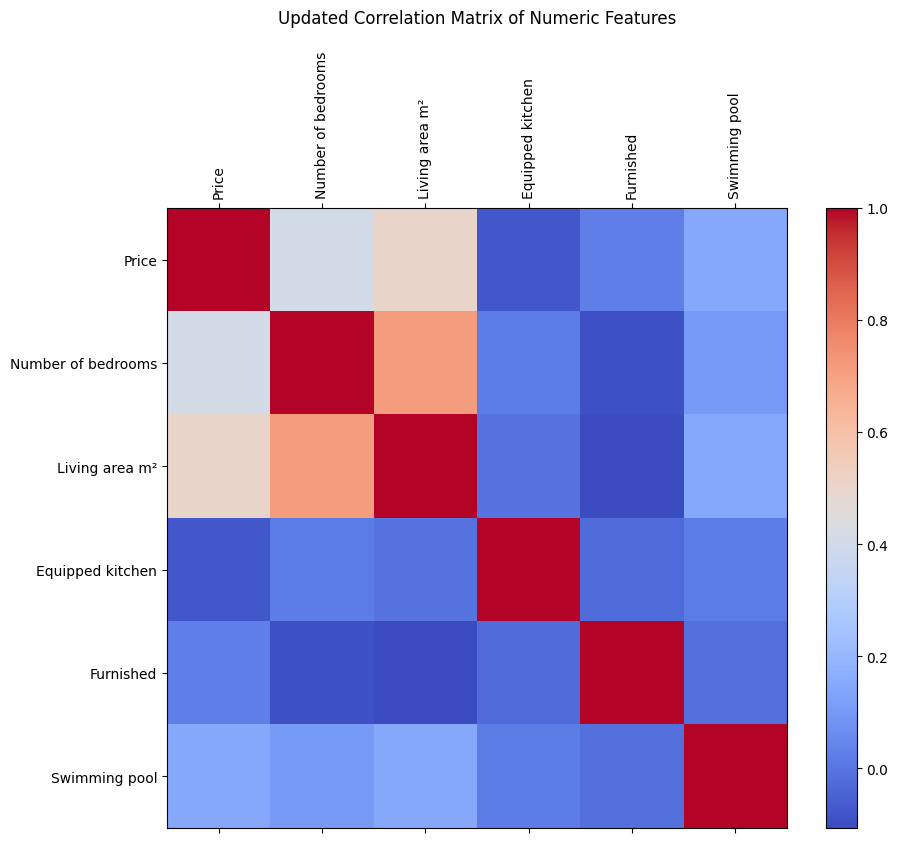

In [4]:
# Calculate the correlation matrix for the reduced dataset (only numeric columns)
numeric_data_reduced = data_reduced.select_dtypes(include=[np.number])
correlation_matrix_reduced = numeric_data_reduced.corr()

# Plot the updated correlation matrix with axis labels
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix_reduced, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix_reduced.columns)), 
           labels=correlation_matrix_reduced.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix_reduced.columns)), 
           labels=correlation_matrix_reduced.columns)
plt.title("Updated Correlation Matrix of Numeric Features", pad=20)
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label encoding to "Building condition" and "Region"
data_reduced['Building condition'] = label_encoder.fit_transform(data_reduced['Building condition']) + 1
data_reduced['Region'] = label_encoder.fit_transform(data_reduced['Region']) + 1

# Apply One-hot encoding to "Property type"
data_encoded = pd.get_dummies(data_reduced, columns=['Property type'], drop_first=True)

# Display the first few rows of the encoded dataset to confirm the changes
data_encoded.head()


,Price,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Region,Property type_house
0,999999,2.0,118.0,0,0,0,1,2,False
1,999999,13.0,778.0,1,0,0,2,3,True
2,999999,2.0,118.0,0,0,0,1,2,False
3,999000,4.0,345.0,1,1,0,2,2,True
4,997000,3.0,144.0,0,0,0,1,1,False


In [7]:
# List of columns to convert
columns_to_convert = ['Building condition'] + [col for col in data_encoded.columns if 'Property type' in col or 'Region' in col]

# Conversion of True/False values ​​to 1/0 only in specified columns
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)

# Check the result
print(data_encoded[columns_to_convert].head())
print(data_encoded.dtypes)
data_encoded.head()

   Building condition  Region  Property type_house
0                   1       2                    0
1                   2       3                    1
2                   1       2                    0
3                   2       2                    1
4                   1       1                    0
Price                    int64
Number of bedrooms     float64
Living area m²         float64
Equipped kitchen         int64
Furnished                int64
Swimming pool            int64
Building condition       int64
Region                   int64
Property type_house      int64
dtype: object


,Price,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Region,Property type_house
0,999999,2.0,118.0,0,0,0,1,2,0
1,999999,13.0,778.0,1,0,0,2,3,1
2,999999,2.0,118.0,0,0,0,1,2,0
3,999000,4.0,345.0,1,1,0,2,2,1
4,997000,3.0,144.0,0,0,0,1,1,0


In [ ]:
КРОК ЗІ СТАНДАРТИЗАЦІЇ 

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to numeric columns (excluding categorical columns that are already encoded)
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Check the first few rows of scaled data
print(data_encoded.head())


      Price  Number of bedrooms  Living area m²  Equipped kitchen  Furnished  \
0  3.275174           -0.637991       -0.337976         -0.801635  -0.200199   
1  3.275174            8.192238        6.971681          1.247451  -0.200199   
2  3.275174           -0.637991       -0.337976         -0.801635  -0.200199   
3  3.269913            0.967506        2.176103          1.247451   4.995029   
4  3.259380            0.164757       -0.050020         -0.801635  -0.200199   

   Swimming pool  Building condition    Region  Property type_house  
0       -0.13428           -1.093721 -0.050495            -1.015194  
1       -0.13428           -0.315591  1.495059             0.985033  
2       -0.13428           -1.093721 -0.050495            -1.015194  
3       -0.13428           -0.315591 -0.050495             0.985033  
4       -0.13428           -1.093721 -1.596049            -1.015194  


Поділ даних на тренувальну та тестову вибірки

In [12]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = data_encoded.drop('Price', axis=1)  # Assuming 'Price' is the target variable
y = data_encoded['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (6684, 8) (6684,)
Test set shape: (1672, 8) (1672,)


LINEAR REGRESSION
1. Train the model on the training sample 
2. Make predictions(передбачення) on the test sample 
3. Calculate key metrics to evaluate(для оцінки) the model's performance.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using MAE, RMSE, and R^2 score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results with rounding for better readability
print("Linear Regression Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae, 2))
print("Mean Squared Error (MSE):", np.round(mse, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape * 100, 2), "%")
print("R^2 Score:", np.round(r2, 2))


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 0.56
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.8
Mean Absolute Percentage Error (MAPE): 210.33 %
R^2 Score: 0.38


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MAE, MSE, RMSE, MAPE, and R^2 score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results with rounding for better readability
print("Random Forest Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_rf, 2))
print("Mean Squared Error (MSE):", np.round(mse_rf, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_rf, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_rf * 100, 2), "%")
print("R^2 Score:", np.round(r2_rf, 2))


Random Forest Regressor Performance Metrics:
Mean Absolute Error (MAE): 0.52
Mean Squared Error (MSE): 0.54
Root Mean Squared Error (RMSE): 0.74
Mean Absolute Percentage Error (MAPE): 273.38 %
R^2 Score: 0.48


Налаштувати гіперпараметри за допомогою RandomizedSearchCV

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV model on the training data
random_search.fit(X_train, y_train)

# Extract the best parameters and score
best_params_rf = random_search.best_params_
best_score_rf = -random_search.best_score_

print("Best Parameters from RandomizedSearchCV:", best_params_rf)
print("Best RMSE Score from RandomizedSearchCV:", best_score_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best RMSE Score from RandomizedSearchCV: 0.6738939074992824


In [16]:
# Initialize the Random Forest Regressor with the best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    random_state=42
)

# Train the model on the entire training dataset
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_final = final_rf_model.predict(X_test)

# Evaluate the final model on the test set
mae_rf_final = mean_absolute_error(y_test, y_pred_rf_final)
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
rmse_rf_final = np.sqrt(mse_rf_final)
mape_rf_final = mean_absolute_percentage_error(y_test, y_pred_rf_final)
r2_rf_final = r2_score(y_test, y_pred_rf_final)

# Display the final performance metrics
print("\nFinal Random Forest Regressor Performance Metrics with Tuned Hyperparameters:")
print("Mean Absolute Error (MAE):", np.round(mae_rf_final, 2))
print("Mean Squared Error (MSE):", np.round(mse_rf_final, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_rf_final, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_rf_final * 100, 2), "%")
print("R^2 Score:", np.round(r2_rf_final, 2))



Final Random Forest Regressor Performance Metrics with Tuned Hyperparameters:
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.47
Root Mean Squared Error (RMSE): 0.68
Mean Absolute Percentage Error (MAPE): 187.01 %
R^2 Score: 0.55


Налаштувати гіперпараметри за допомогою GridSearchCV

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV model on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and score
best_params_rf = grid_search.best_params_
best_score_rf = -grid_search.best_score_

print("Best Parameters from GridSearchCV:", best_params_rf)
print("Best RMSE Score from GridSearchCV:", best_score_rf)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

Дуже довго я відмовилась від цієї ідеї
Спробую XgBoost

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the parameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=1),
    param_distributions=param_dist_xgb,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV model on the training data
random_search_xgb.fit(X_train, y_train)

# Extract the best parameters and score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = -random_search_xgb.best_score_

print("Best Parameters from RandomizedSearchCV for XGBoost:", best_params_xgb)
print("Best RMSE Score from RandomizedSearchCV for XGBoost:", best_score_xgb)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best RMSE Score from RandomizedSearchCV for XGBoost: 0.6735818922523936


Tuning XGBoost parameters with RandomizedSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=1),
    param_distributions=param_dist_xgb,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV model on the training data
random_search_xgb.fit(X_train, y_train)

# Extract the best parameters and score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = -random_search_xgb.best_score_

print("Best Parameters from RandomizedSearchCV for XGBoost:", best_params_xgb)
print("Best RMSE Score from RandomizedSearchCV for XGBoost:", best_score_xgb)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best RMSE Score from RandomizedSearchCV for XGBoost: 0.6735818922523936


In [20]:
# Initialize the XGBoost Regressor with the best parameters
final_xgb_model = XGBRegressor(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    gamma=best_params_xgb['gamma'],
    random_state=42,
    verbosity=1
)

# Train the model on the entire training dataset
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_final = final_xgb_model.predict(X_test)

# Evaluate the final model on the test set
mae_xgb_final = mean_absolute_error(y_test, y_pred_xgb_final)
mse_xgb_final = mean_squared_error(y_test, y_pred_xgb_final)
rmse_xgb_final = np.sqrt(mse_xgb_final)
mape_xgb_final = mean_absolute_percentage_error(y_test, y_pred_xgb_final)
r2_xgb_final = r2_score(y_test, y_pred_xgb_final)

# Display the final performance metrics
print("\nFinal XGBoost Regressor Performance Metrics with Tuned Hyperparameters:")
print("Mean Absolute Error (MAE):", np.round(mae_xgb_final, 2))
print("Mean Squared Error (MSE):", np.round(mse_xgb_final, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_xgb_final, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_xgb_final * 100, 2), "%")
print("R^2 Score:", np.round(r2_xgb_final, 2))



Final XGBoost Regressor Performance Metrics with Tuned Hyperparameters:
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.47
Root Mean Squared Error (RMSE): 0.68
Mean Absolute Percentage Error (MAPE): 186.27 %
R^2 Score: 0.55


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the extended parameter grid for XGBoost
param_dist_xgb_advanced = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Initialize RandomizedSearchCV
random_search_xgb_advanced = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=1),
    param_distributions=param_dist_xgb_advanced,
    n_iter=50,  # Increase this for a larger search, but it will take more time
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV model on the training data
random_search_xgb_advanced.fit(X_train, y_train)

# Extract the best parameters and score
best_params_xgb_advanced = random_search_xgb_advanced.best_params_
best_score_xgb_advanced = -random_search_xgb_advanced.best_score_

print("Best Parameters from Advanced RandomizedSearchCV for XGBoost:", best_params_xgb_advanced)
print("Best RMSE Score from Advanced RandomizedSearchCV for XGBoost:", best_score_xgb_advanced)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from Advanced RandomizedSearchCV for XGBoost: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best RMSE Score from Advanced RandomizedSearchCV for XGBoost: 0.6747285233797824


In [22]:
# Initialize the XGBoost Regressor with the advanced best parameters
final_xgb_model_advanced = XGBRegressor(
    n_estimators=best_params_xgb_advanced['n_estimators'],
    max_depth=best_params_xgb_advanced['max_depth'],
    learning_rate=best_params_xgb_advanced['learning_rate'],
    subsample=best_params_xgb_advanced['subsample'],
    colsample_bytree=best_params_xgb_advanced['colsample_bytree'],
    gamma=best_params_xgb_advanced['gamma'],
    reg_alpha=best_params_xgb_advanced['reg_alpha'],
    reg_lambda=best_params_xgb_advanced['reg_lambda'],
    random_state=42,
    verbosity=1
)

# Train the model on the entire training dataset
final_xgb_model_advanced.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_advanced = final_xgb_model_advanced.predict(X_test)

# Evaluate the final model on the test set
mae_xgb_advanced = mean_absolute_error(y_test, y_pred_xgb_advanced)
mse_xgb_advanced = mean_squared_error(y_test, y_pred_xgb_advanced)
rmse_xgb_advanced = np.sqrt(mse_xgb_advanced)
mape_xgb_advanced = mean_absolute_percentage_error(y_test, y_pred_xgb_advanced)
r2_xgb_advanced = r2_score(y_test, y_pred_xgb_advanced)

# Display the final performance metrics
print("\nFinal Advanced XGBoost Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_xgb_advanced, 2))
print("Mean Squared Error (MSE):", np.round(mse_xgb_advanced, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_xgb_advanced, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_xgb_advanced * 100, 2), "%")
print("R^2 Score:", np.round(r2_xgb_advanced, 2))



Final Advanced XGBoost Regressor Performance Metrics:
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.47
Root Mean Squared Error (RMSE): 0.69
Mean Absolute Percentage Error (MAPE): 190.52 %
R^2 Score: 0.55


04.11.24
Since the model is far from ideal, I want to try to divide the property type separately into houses and apartments, and then somehow calculate the price per square meter and how it can increase as a price per room in square meters.

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into features and target variable
X = data_encoded.drop('Price', axis=1)  # Assuming 'Price' is the target variable
y = data_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply logarithmic transformation to the target variable
y_train_log = np.log1p(y_train)  # log1p avoids log(0) issues
y_test_log = np.log1p(y_test)


In [10]:
# Apply logarithmic transformation to the target variable
y_train_log = np.log1p(y_train)  # log1p avoids log(0) issues
y_test_log = np.log1p(y_test)


This code implements three models for predicting real estate prices - linear regression, random forest, and XGBoost. I applied a logarithmic transformation to the target variable to smooth the distribution and reduce the effect of large values. Each model is trained on the transformed data, and after prediction, the results are returned to the original scale.

Next, I evaluated the accuracy of each model using metrics such as MAE, RMSE, MAPE, and R². This made it possible to compare performance and determine which of the models better predicts prices.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Apply logarithmic transformation to the target variable
y_train_log = np.log1p(y_train)  # log1p to avoid log(0)
y_test_log = np.log1p(y_test)

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train and predict for Linear Regression
linear_model.fit(X_train, y_train_log)
y_pred_log_lr = linear_model.predict(X_test)
y_pred_lr = np.expm1(y_pred_log_lr)

# Train and predict for Random Forest
rf_model.fit(X_train, y_train_log)
y_pred_log_rf = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

# Train and predict for XGBoost
xgb_model.fit(X_train, y_train_log)
y_pred_log_xgb = xgb_model.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print("MAE:", np.round(mae, 2), "MSE:", np.round(mse, 2), "RMSE:", np.round(rmse, 2), 
          "MAPE:", np.round(mape * 100, 2), "%", "R^2:", np.round(r2, 2))

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")




Linear Regression Performance Metrics:
MAE: 115786.56 MSE: 125769077545.9 RMSE: 354639.36 MAPE: 31.7 % R^2: -2.34

Random Forest Performance Metrics:
MAE: 97448.53 MSE: 19654965360.83 RMSE: 140196.17 MAPE: 27.1 % R^2: 0.48

XGBoost Performance Metrics:
MAE: 94024.19 MSE: 18923072802.64 RMSE: 137561.16 MAPE: 26.35 % R^2: 0.5


XGBoost has the best accuracy and lowest error among the three models.

Prepare the data for machine learning, including removing redundant columns and encoding categorical variables
Removing columns, Label Encoding for categorical variables(Building condition та Region), One-hot Encoding for Property type(Property type), The drop_first=True option drops one of the categories to avoid multicollinearity, leaving the base category as the reference.

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv'
data = pd.read_csv(file_path)

# Specify columns to drop
columns_to_drop = [
    'Unnamed: 0', 
    'Property ID', 
    'Locality data', 
    'Open fire', 
    'Terrace surface m²', 
    'Garden area m²', 
    'Price per m²', 
    'Province'
]

# Drop the specified columns
data_reduced = data.drop(columns=columns_to_drop)

# Apply Label Encoding to 'Building condition' and 'Region' columns
label_encoder = LabelEncoder()
data_reduced['Building condition'] = label_encoder.fit_transform(data_reduced['Building condition']) + 1
data_reduced['Region'] = label_encoder.fit_transform(data_reduced['Region']) + 1

# Apply One-hot Encoding to 'Property type' column without dropping the base level
data_encoded = pd.get_dummies(data_reduced, columns=['Property type'], drop_first=True)

# Display the column names after encoding to verify the changes
print("Columns after encoding:")
print(data_encoded.columns)

# Display the first few rows to review the transformed data
print("First few rows of the encoded dataset:")
print(data_encoded.head())



Columns after encoding:
Index(['Price', 'Number of bedrooms', 'Living area m²', 'Equipped kitchen',
       'Furnished', 'Swimming pool', 'Building condition', 'Region',
       'Property type_house'],
      dtype='object')
First few rows of the encoded dataset:
    Price  Number of bedrooms  Living area m²  Equipped kitchen  Furnished  \
0  999999                 2.0           118.0                 0          0   
1  999999                13.0           778.0                 1          0   
2  999999                 2.0           118.0                 0          0   
3  999000                 4.0           345.0                 1          1   
4  997000                 3.0           144.0                 0          0   

   Swimming pool  Building condition  Region  Property type_house  
0              0                   1       2                False  
1              0                   2       3                 True  
2              0                   1       2                False 

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv'
data = pd.read_csv(file_path)

# Specify columns to drop
columns_to_drop = [
    'Unnamed: 0', 
    'Property ID', 
    'Locality data', 
    'Open fire', 
    'Terrace surface m²', 
    'Garden area m²', 
    'Price per m²', 
    'Province'
]

# Drop the specified columns
data_reduced = data.drop(columns=columns_to_drop)

# Encode categorical variables
label_encoder = LabelEncoder()
data_reduced['Building condition'] = label_encoder.fit_transform(data_reduced['Building condition']) + 1
data_reduced['Region'] = label_encoder.fit_transform(data_reduced['Region']) + 1

# One-hot encode 'Property type' without dropping any columns
data_encoded = pd.get_dummies(data_reduced, columns=['Property type'])

# Validate all columns after encoding
print("Columns after encoding:")
print(data_encoded.columns)

# Define the target variable and features
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Additional check: segmentation of data into "apartments" and "houses" if such columns exist
if 'Property type_apartment' in X_train.columns and 'Property type_house' in X_train.columns:
    X_train_apartments = X_train[X_train['Property type_apartment'] == 1]
    y_train_apartments = y_train[X_train['Property type_apartment'] == 1]

    X_train_houses = X_train[X_train['Property type_house'] == 1]
    y_train_houses = y_train[X_train['Property type_house'] == 1]

    print("Data shape for apartments:", X_train_apartments.shape, y_train_apartments.shape)
    print("Data shape for houses:", X_train_houses.shape, y_train_houses.shape)
else:
    print("The columns for the 'Property type' category are missing or have different names.")


Columns after encoding:
Index(['Price', 'Number of bedrooms', 'Living area m²', 'Equipped kitchen',
       'Furnished', 'Swimming pool', 'Building condition', 'Region',
       'Property type_apartment', 'Property type_house'],
      dtype='object')
Data shape for apartments: (3302, 9) (3302,)
Data shape for houses: (3382, 9) (3382,)


In [41]:
# Identification of potential outliers using summary of descriptive statistics
print(y_train.describe())

# For example, removing values ​​above a certain threshold, such as the 99th percentile
threshold = y_train.quantile(0.99)
X_train_no_outliers = X_train[y_train < threshold]
y_train_no_outliers = y_train[y_train < threshold]

count      6684.000000
mean     377320.231448
std      188835.066191
min       35000.000000
25%      239000.000000
50%      335000.000000
75%      460000.000000
max      999999.000000
Name: Price, dtype: float64


This approach cleans the data by removing extreme price values ​​to make the model more stable and accurate.

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np

# Display descriptive statistics for the target variable
print("Descriptive statistics for the target variable (Price):")
print(y_train.describe())

# Set the threshold for outliers (99th percentile)
threshold = y_train.quantile(0.99)

# Filter out outliers from the training set
X_train_no_outliers = X_train[y_train < threshold]
y_train_no_outliers = y_train[y_train < threshold]

print("\nShape of data after removing outliers:")
print("X_train_no_outliers:", X_train_no_outliers.shape)
print("y_train_no_outliers:", y_train_no_outliers.shape)


Descriptive statistics for the target variable (Price):
count      6684.000000
mean     377320.231448
std      188835.066191
min       35000.000000
25%      239000.000000
50%      335000.000000
75%      460000.000000
max      999999.000000
Name: Price, dtype: float64

Shape of data after removing outliers:
X_train_no_outliers: (6616, 9)
y_train_no_outliers: (6616,)


Окремо для будинків та квартир СЕГМЕНТАЦІЯ

In [43]:
from xgboost import XGBRegressor

# Check if the necessary columns for 'Property type' segmentation exist
if 'Property type_apartment' in X_train_no_outliers.columns and 'Property type_house' in X_train_no_outliers.columns:
    # Segment data for apartments
    X_train_apartments = X_train_no_outliers[X_train_no_outliers['Property type_apartment'] == 1]
    y_train_apartments = y_train_no_outliers[X_train_no_outliers['Property type_apartment'] == 1]

    # Segment data for houses
    X_train_houses = X_train_no_outliers[X_train_no_outliers['Property type_house'] == 1]
    y_train_houses = y_train_no_outliers[X_train_no_outliers['Property type_house'] == 1]

    print("Shape of data for apartments:", X_train_apartments.shape, y_train_apartments.shape)
    print("Shape of data for houses:", X_train_houses.shape, y_train_houses.shape)

    # Initialize and train separate models for each property type
    # Replace 'best_params_xgb_advanced' with your actual parameters if needed
    xgb_apartment_model = XGBRegressor(**best_params_xgb_advanced, random_state=42)
    xgb_apartment_model.fit(X_train_apartments, y_train_apartments)

    xgb_house_model = XGBRegressor(**best_params_xgb_advanced, random_state=42)
    xgb_house_model.fit(X_train_houses, y_train_houses)

    print("Models trained separately for apartments and houses.")
else:
    print("Columns for 'Property type' segmentation are missing or named differently.")


Shape of data for apartments: (3275, 9) (3275,)
Shape of data for houses: (3341, 9) (3341,)
Models trained separately for apartments and houses.


Збалансування ваг для цільових значень
Ми будемо використовувати обернені значення цільової змінної як ваги для тренувальних даних.

In [44]:
# Calculate weights inversely proportional to target variable values
weights_apartments = 1 / y_train_apartments
weights_houses = 1 / y_train_houses

# Train the apartment model with sample weights
xgb_apartment_model_weighted = XGBRegressor(**best_params_xgb_advanced, random_state=42)
xgb_apartment_model_weighted.fit(X_train_apartments, y_train_apartments, sample_weight=weights_apartments)

# Train the house model with sample weights
xgb_house_model_weighted = XGBRegressor(**best_params_xgb_advanced, random_state=42)
xgb_house_model_weighted.fit(X_train_houses, y_train_houses, sample_weight=weights_houses)

print("Weighted models trained for apartments and houses.")


Weighted models trained for apartments and houses.


In [45]:
# Update the parameters for more precise learning
optimized_params = best_params_xgb_advanced.copy()
optimized_params.update({
    'learning_rate': 0.01,  # smaller learning rate for finer updates
    'n_estimators': 1000    # increased number of estimators
})

# Train the optimized apartment model with new parameters
final_xgb_optimized_apartment = XGBRegressor(**optimized_params, random_state=42)
final_xgb_optimized_apartment.fit(X_train_apartments, y_train_apartments, sample_weight=weights_apartments)

# Train the optimized house model with new parameters
final_xgb_optimized_house = XGBRegressor(**optimized_params, random_state=42)
final_xgb_optimized_house.fit(X_train_houses, y_train_houses, sample_weight=weights_houses)

print("Optimized models trained for apartments and houses with updated parameters.")


Optimized models trained for apartments and houses with updated parameters.


Інженерія ознак. додамо нові ознаки, такі як ціна за квадратний метр та кількість спалень на квадратний метр, щоб допомогти моделі краще захопити зв'язки в даних.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Adding new features to the dataset
data_encoded['price_per_sqm'] = (data_encoded['Price'] / (data_encoded['Living area m²'] + 1)).round(2)
data_encoded['bedrooms_per_sqm'] = (data_encoded['Number of bedrooms'] / (data_encoded['Living area m²'] + 1)).round(3)

# Redefine target variable and features after adding new features
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape to confirm the new features were added
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("New features added: price_per_sqm, bedrooms_per_sqm")
print(data_encoded.head())



Training set shape: (6684, 11)
Test set shape: (1672, 11)
New features added: price_per_sqm, bedrooms_per_sqm
    Price  Number of bedrooms  Living area m²  Equipped kitchen  Furnished  \
0  999999                 2.0           118.0                 0          0   
1  999999                13.0           778.0                 1          0   
2  999999                 2.0           118.0                 0          0   
3  999000                 4.0           345.0                 1          1   
4  997000                 3.0           144.0                 0          0   

   Swimming pool  Building condition  Region  Property type_apartment  \
0              0                   1       2                        1   
1              0                   2       3                        0   
2              0                   1       2                        1   
3              0                   2       2                        0   
4              0                   1       1            

In [62]:
# List of columns to convert, including the new 'Property type' columns
columns_to_convert = ['Building condition', 'Region', 'Property type_house', 'Property type_apartment']

# Convert True/False values ​​​​to 1/0 in specified columns
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)

# Check the result
print("Converted columns:")
print(data_encoded[columns_to_convert].head())
print("Data types in data_encoded after conversion:")
print(data_encoded.dtypes)
print(data_encoded.head())


Converted columns:
   Building condition  Region  Property type_house  Property type_apartment
0                   1       2                    0                        1
1                   2       3                    1                        0
2                   1       2                    0                        1
3                   2       2                    1                        0
4                   1       1                    0                        1
Data types in data_encoded after conversion:
Price                        int64
Number of bedrooms         float64
Living area m²             float64
Equipped kitchen             int64
Furnished                    int64
Swimming pool                int64
Building condition           int64
Region                       int64
Property type_apartment      int64
Property type_house          int64
price_per_sqm              float64
bedrooms_per_sqm           float64
dtype: object
    Price  Number of bedrooms  Living area m² 

Заключна оцінка моделей для сегментованих даних (квартири та будинки)
Ми застосуємо моделі до тестового набору даних та оцінюватимемо їх за оновленими метриками.

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Finalize dataset by segmenting apartments and houses
X_train_apartments = X_train[X_train['Property type_apartment'] == 1]
y_train_apartments = y_train[X_train['Property type_apartment'] == 1]
X_train_houses = X_train[X_train['Property type_house'] == 1]
y_train_houses = y_train[X_train['Property type_house'] == 1]

# Define and train XGBoost models for apartments and houses
xgb_apartment_model = XGBRegressor(random_state=42)
xgb_apartment_model.fit(X_train_apartments, y_train_apartments)

xgb_house_model = XGBRegressor(random_state=42)
xgb_house_model.fit(X_train_houses, y_train_houses)

# Predict on test data
X_test_apartments = X_test[X_test['Property type_apartment'] == 1]
y_test_apartments = y_test[X_test['Property type_apartment'] == 1]
y_pred_apartments = np.expm1(xgb_apartment_model.predict(X_test_apartments))

X_test_houses = X_test[X_test['Property type_house'] == 1]
y_test_houses = y_test[X_test['Property type_house'] == 1]
y_pred_houses = np.expm1(xgb_house_model.predict(X_test_houses))

# Combine predictions for apartments and houses
y_test_combined = np.concatenate([y_test_apartments, y_test_houses])
y_pred_combined = np.concatenate([y_pred_apartments, y_pred_houses])

# Calculate and print final evaluation metrics
mae_final = mean_absolute_error(y_test_combined, y_pred_combined)
mse_final = mean_squared_error(y_test_combined, y_pred_combined)
rmse_final = np.sqrt(mse_final)
mape_final = mean_absolute_percentage_error(y_test_combined, y_pred_combined)
r2_final = r2_score(y_test_combined, y_pred_combined)

print("\nFinal Model Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_final, 2))
print("Mean Squared Error (MSE):", np.round(mse_final, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_final, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_final * 100, 2), "%")
print("R^2 Score:", np.round(r2_final, 2))


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_11816\2769974156.py:21: RuntimeWarning: overflow encountered in expm1
  y_pred_apartments = np.expm1(xgb_apartment_model.predict(X_test_apartments))
C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_11816\2769974156.py:25: RuntimeWarning: overflow encountered in expm1
  y_pred_houses = np.expm1(xgb_house_model.predict(X_test_houses))


ValueError: Input contains infinity or a value too large for dtype('float32').

In [68]:
# Check y_pred_apartments for inf values ​​and replace with a very large number
y_pred_apartments = np.where(np.isinf(y_pred_apartments), np.finfo(np.float32).max, y_pred_apartments)
y_pred_houses = np.where(np.isinf(y_pred_houses), np.finfo(np.float32).max, y_pred_houses)

# Check for NaN and replace with mean
y_pred_apartments = np.nan_to_num(y_pred_apartments, nan=np.nanmean(y_pred_apartments))
y_pred_houses = np.nan_to_num(y_pred_houses, nan=np.nanmean(y_pred_houses))

# Merging predictions after cleaning
y_pred_combined = np.concatenate([y_pred_apartments, y_pred_houses])
y_test_combined = np.concatenate([y_test_apartments, y_test_houses])

# Check the final values ​​for excessive values ​​and correction
y_pred_combined = np.where(y_pred_combined > np.finfo(np.float32).max, np.finfo(np.float32).max, y_pred_combined)

# Evaluation of metrics
mae_final = mean_absolute_error(y_test_combined, y_pred_combined)
mse_final = mean_squared_error(y_test_combined, y_pred_combined)
rmse_final = np.sqrt(mse_final)
mape_final = mean_absolute_percentage_error(y_test_combined, y_pred_combined)
r2_final = r2_score(y_test_combined, y_pred_combined)

print("\nFinal Model Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_final, 2))
print("Mean Squared Error (MSE):", np.round(mse_final, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_final, 2))
print("Mean Absolute Percentage Error (MAPE):", np.round(mape_final * 100, 2), "%")
print("R^2 Score:", np.round(r2_final, 2))


Final Model Performance Metrics:
Mean Absolute Error (MAE): 3.4028234663852886e+38
Mean Squared Error (MSE): 1.1579207543382391e+77
Root Mean Squared Error (RMSE): 3.4028234663852886e+38
Mean Absolute Percentage Error (MAPE): 1.1481443681058538e+35 %
R^2 Score: -inf


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


In [69]:
# Checking the distribution of new features
print("Max value of 'price_per_sqm':", data_encoded['price_per_sqm'].max())
print("Max value of 'bedrooms_per_sqm':", data_encoded['bedrooms_per_sqm'].max())

# Limiting maximum values ​​to avoid overflow
data_encoded['price_per_sqm'] = np.where(data_encoded['price_per_sqm'] > 1e5, 1e5, data_encoded['price_per_sqm'])
data_encoded['bedrooms_per_sqm'] = np.where(data_encoded['bedrooms_per_sqm'] > 1e2, 1e2, data_encoded['bedrooms_per_sqm'])

# Separation of data into training and test samples
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation and retraining of models on cleaned data


Max value of 'price_per_sqm': 14983.33
Max value of 'bedrooms_per_sqm': 0.085


In [72]:
import numpy as np

# Cap predictions at a reasonable upper bound for the log-transformed values
max_log_value = 20  # Example cap, adjust based on data distribution

# Apply capping before exponentiation
y_pred_apartments_log = np.clip(y_pred_apartments_log, a_min=None, a_max=max_log_value)
y_pred_houses_log = np.clip(y_pred_houses_log, a_min=None, a_max=max_log_value)

# Transform predictions back from log scale to original scale
y_pred_apartments = np.expm1(y_pred_apartments_log)
y_pred_houses = np.expm1(y_pred_houses_log)

# Combine predictions and actual values for final evaluation
y_pred_combined = np.concatenate([y_pred_apartments, y_pred_houses])
y_test_combined = np.concatenate([y_test_apartments, y_test_houses])

# Calculate and print final evaluation metrics
try:
    mae_final = mean_absolute_error(y_test_combined, y_pred_combined)
    mse_final = mean_squared_error(y_test_combined, y_pred_combined)
    rmse_final = np.sqrt(mse_final)
    mape_final = mean_absolute_percentage_error(y_test_combined, y_pred_combined)
    r2_final = r2_score(y_test_combined, y_pred_combined)

    print("\nFinal Model Performance Metrics:")
    print("Mean Absolute Error (MAE):", np.round(mae_final, 2))
    print("Mean Squared Error (MSE):", np.round(mse_final, 2))
    print("Root Mean Squared Error (RMSE):", np.round(rmse_final, 2))
    print("Mean Absolute Percentage Error (MAPE):", np.round(mape_final * 100, 2), "%")
    print("R^2 Score:", np.round(r2_final, 2))

except ValueError as e:
    print("An error occurred during model evaluation:", e)




Final Model Performance Metrics:
Mean Absolute Error (MAE): 484783858.9
Mean Squared Error (MSE): 2.3501542748881968e+17
Root Mean Squared Error (RMSE): 484783897.72
Mean Absolute Percentage Error (MAPE): 163599.26 %
R^2 Score: -6244170.0


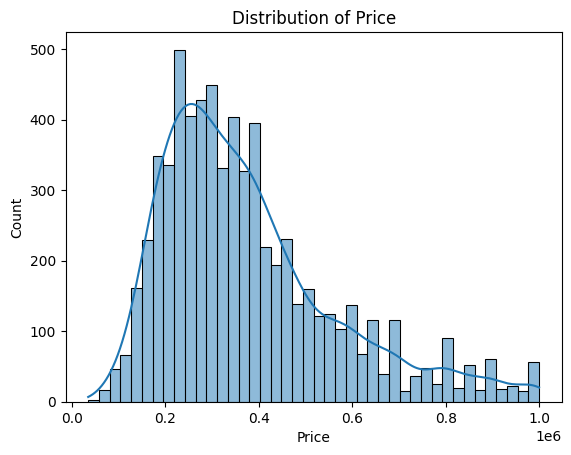

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.show()


In [75]:
y_train_log = np.log1p(y_train)  # Apply log transformation
y_test_log = np.log1p(y_test)


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
from xgboost import XGBRegressor

# Define the best parameters (example parameters, replace with actual values)
best_params_xgb_advanced = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'gamma': 0.3,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5
}

# Initialize the XGBoost model with the best parameters
final_xgb_model_advanced = XGBRegressor(**best_params_xgb_advanced, random_state=42)



In [79]:
# Train the model with log-transformed target
final_xgb_model_advanced.fit(X_train_scaled, y_train_log)

# Predict on the test set and convert predictions back to original scale
y_pred_log = final_xgb_model_advanced.predict(X_test_scaled)
y_pred_final = np.expm1(y_pred_log)  # Convert back from log scale


In [82]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Step 1: Initialize the model with the best parameters
best_params_xgb_advanced = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'gamma': 0.3,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5
}

# Initialize the model
final_xgb_model_advanced = XGBRegressor(**best_params_xgb_advanced, random_state=42)

# Step 2: Train the model on the log-transformed target variable
final_xgb_model_advanced.fit(X_train_scaled, y_train_log)

# Step 3: Predict and transform back to the original scale
y_pred_log = final_xgb_model_advanced.predict(X_test_scaled)
y_pred_final = np.expm1(y_pred_log)  # Apply expm1 to reverse the log1p transformation

# Step 4: Evaluate the model
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
mape_final = mean_absolute_percentage_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)


# Print out the final performance metrics with thousand separators and rounding to three decimal places
print("\nFinal XGBoost Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_final:,.3f}")
print(f"Mean Squared Error (MSE): {mse_final:,.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:,.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_final * 100:,.3f}%")
print(f"R² Score: {r2_final:.2f}")



Final XGBoost Model Performance Metrics:
Mean Absolute Error (MAE): 27,910.149
Mean Squared Error (MSE): 2,400,930,620.386
Root Mean Squared Error (RMSE): 48,999.292
Mean Absolute Percentage Error (MAPE): 7.041%
R² Score: 0.94
